## sklearn-Kmeans程式教學

### 一、Kmeans在Sklearn裡面就有套件可以使用，使用pip install即可安裝

In [1]:
! pip install sklearn

### 將套件(Package)輸入到程式之中

In [2]:
#輸入datasets
from sklearn import datasets
#pandas可以提供高效能、簡易使用的資料格式(DataFrame)，讓使用者可以快速操作及分析資料
import pandas as pd
#數學公式計算都靠它
import numpy as np
#畫圖都靠它
import matplotlib.pyplot as plt
#此套件可將資料自由切分成 訓練資料集 和 測試資料集
from sklearn.model_selection import train_test_split
#標準化資料集
from sklearn.preprocessing import minmax_scale
#KMeans分類器演算法的套件
from sklearn.cluster import KMeans
from sklearn import metrics
#計算accuracy,recall,precision測量指標
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

### 二、使用乳癌數據集(Breast Cancer dataset)來做數據分析-資料前處理
Breast Cancer 資料集的介紹：http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29

In [3]:
#輸入資料集
breast = datasets.load_breast_cancer()

In [4]:
#iris['data']是資料內容
#數據標準化(normalization)主要解決不同性質數據問題，讓每一個性質的資料可以在同一個起跑點作分析
#常見方法有:Max-Min scalar; z-score statistic scalar; maxabs scaler; robust scaler等
#此處我將使用Max-Min scalar做示範
x_breast = minmax_scale(breast['data'],feature_range=(0, 1), axis=0, copy=True)

In [5]:
#存取成dataFrame形式:  iris['feature_names']是資料標題
x_breast = pd.DataFrame(x_breast, columns=breast['feature_names'])
#只要看到".head()"都是pandas呈現資料用
x_breast.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433


In [6]:
#存取成dataFrame形式: iris['target']是類別
y_breast = pd.DataFrame(breast['target'], columns=['target'])
y_breast.head(3)

,target
0,0
1,0
2,0


In [7]:
#將breast資料隨機切分成 70%訓練資料集 和 30%測試資料集
X_train, X_test, y_train, y_test = train_test_split(
    x_breast, y_breast, test_size=0.3, random_state=0)

### 三、KMeans分類演算法-決定K值

In [8]:
#KMeans演算法的設定
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = KMeans(n_clusters = k).fit(X_train)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(X_train, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

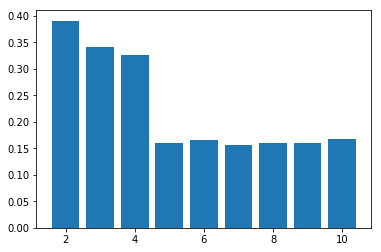

In [9]:
plt.bar(ks, silhouette_avgs)
plt.show()

In [10]:
#將訓練資料集丟入SVM進行訓練
km = KMeans(n_clusters=2)  #K=2群
y_pred = km.fit_predict(X_test)

In [11]:
y_pred[y_pred == 1]=2
y_pred[y_pred == 0]=1
y_pred[y_pred == 2]=0
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [12]:
#測量是否預測準確
confu_mat = confusion_matrix(y_test, y_pred, labels=[0,1])

print('confusion matrix = \n' + str(confu_mat))

confusion matrix = 
[[ 55   8]
 [  8 100]]
